In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats,integrate
import matplotlib.pyplot as plt
sns.set(color_codes = True)
np.random.seed(sum(map(ord,"distributions")))
x = np.random.normal(size=100)
sns.distplot(x,kde=False)

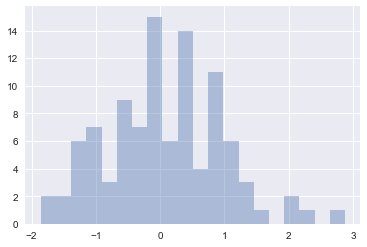

In [2]:
sns.distplot(x,bins=20,kde=False) # 切分为20小块

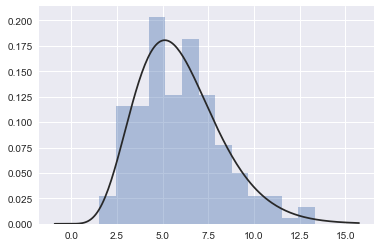

In [3]:
x = np.random.gamma(6,size=200)
sns.distplot(x,kde=False,fit=stats.gamma) 

In [4]:
mean,cov = [0,1],[(1,0.5),(0.5,1)]
data = np.random.multivariate_normal(mean,cov,200) # 生成指定的均值和协方差
df = pd.DataFrame(data,columns=["x","y"])

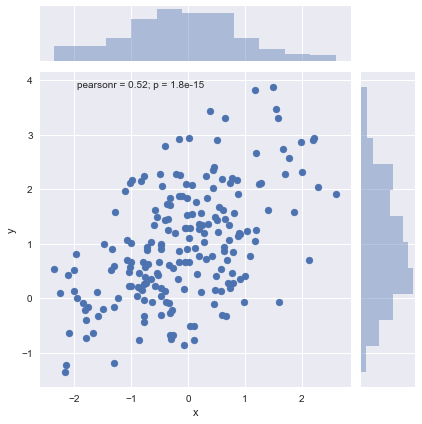

In [5]:
sns.jointplot(x="x",y = 'y',data = df)# 观测两个变量的分布关系，而且还输出皮尔森指数

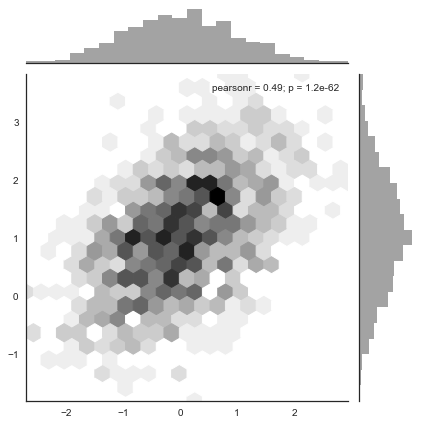

In [6]:
# 如果数据很多的话，用hex图能更好的显示出分布
x,y = np.random.multivariate_normal(mean,cov,1000).T
with sns.axes_style('white'):
    sns.jointplot(x=x,y = y,kind='hex',color='k')
# 可以看出结果分布较多是在中间位置，通过颜色深浅看出分布

In [7]:
np.random.seed(sum(map(ord,"regression")))
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


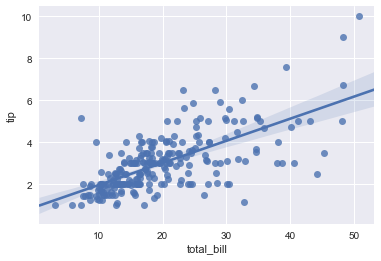

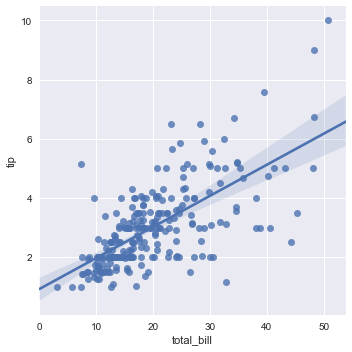

In [8]:
#regplot() 和 lmplot()都可以绘制回归关系，后者功能更多，规范也多。
sns.regplot(x="total_bill",y="tip",data=tips)
sns.lmplot(x="total_bill",y="tip",data=tips)

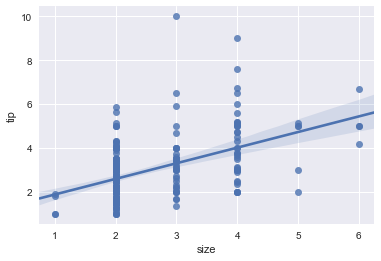

In [9]:
sns.regplot(x="size",y="tip",data=tips)
# 看出结果并不好

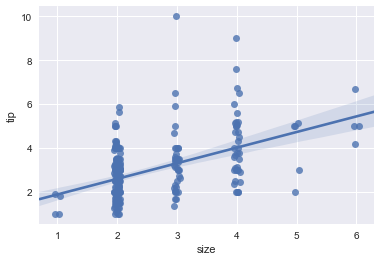

In [10]:
sns.regplot(x="size",y="tip",data=tips,x_jitter=0.05)
# 原始数据集是类别值，都是整数，现在加了点浮动
# 使得离散值，变得像连续值

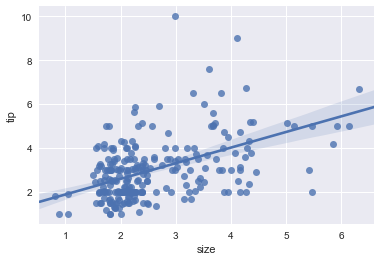

In [11]:
sns.regplot(x="size",y="tip",data=tips,x_jitter=0.5)

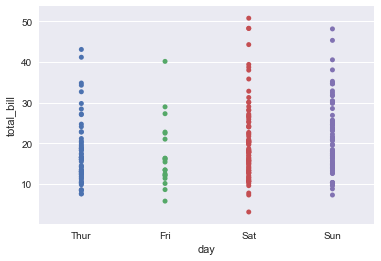

In [12]:
# 对类别值的可视化展示
titanic = sns.load_dataset("titanic")
iris = sns.load_dataset("iris")
# 像散点图，但是不怎么看得出来，因为都重叠了，影响观察数据量
sns.stripplot(x='day',y="total_bill",data=tips)

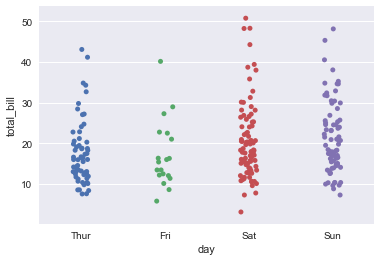

In [13]:
sns.stripplot(x='day',y="total_bill",data=tips,jitter=True)
# jitter=True相当于往左右偏移，使得不重叠

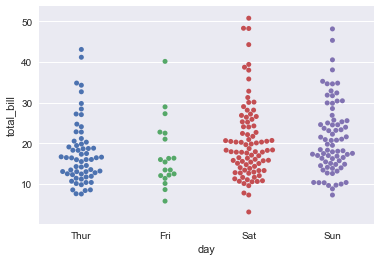

In [14]:
sns.swarmplot(x='day',y="total_bill",data=tips)
# 画出来像一棵树

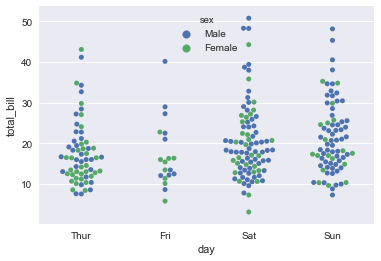

In [15]:
sns.swarmplot(x='day',y="total_bill",hue='sex',data=tips)

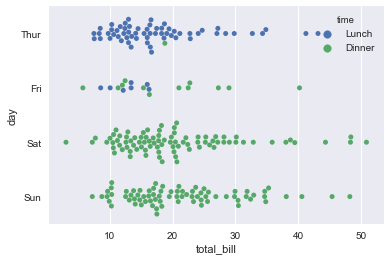

In [16]:
sns.swarmplot(y='day',x="total_bill",hue='time',data=tips)

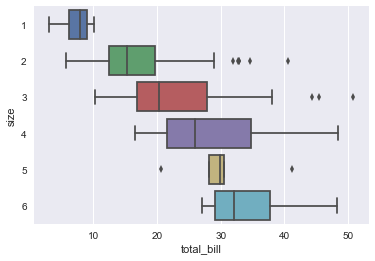

In [41]:
# sns.boxplot(x='day',y='total_bill',hue="time",data=tips)# 竖着画没要求
sns.boxplot(y='size',x='total_bill',data=tips,orient="h")# 可以横着画，但是必须是数值型

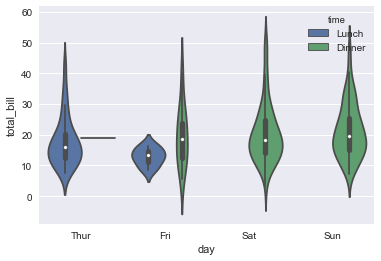

In [18]:
sns.violinplot(x='day',y='total_bill',hue="time",data=tips)

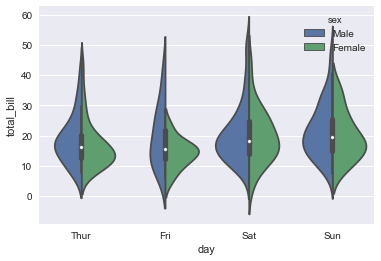

In [19]:
sns.violinplot(x='day',y='total_bill',hue="sex",data=tips,split=True)

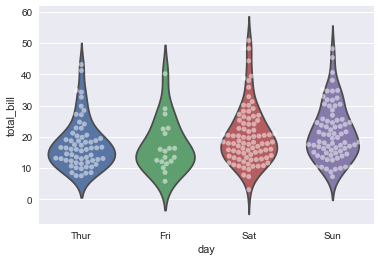

In [20]:
sns.violinplot(x='day',y='total_bill',data=tips,inner=None)
sns.swarmplot(x='day',y="total_bill",data=tips,color='w',alpha=0.5)

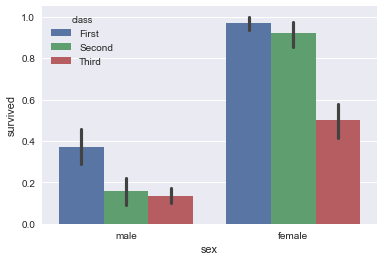

In [21]:
sns.barplot(x='sex',y='survived',hue='class',data=titanic)

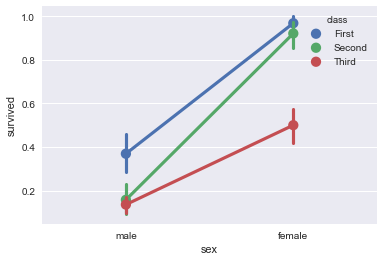

In [22]:
sns.pointplot(x='sex',y='survived',hue='class',data=titanic)
#看差异度

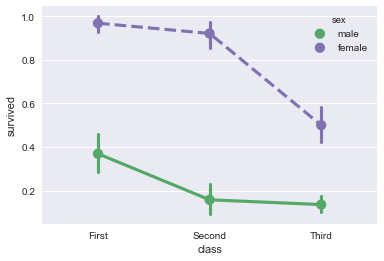

In [33]:
sns.pointplot(x='class',y='survived',hue='sex',data=titanic,
              palette={"male":"g","female":"m"},
              maker=["s","o"],
              linestyles=["-","--"])

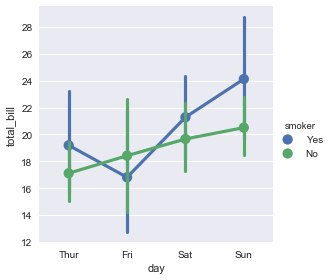

In [43]:
#多面板分类图
sns.factorplot(x='day',y='total_bill',hue='smoker',data=tips)

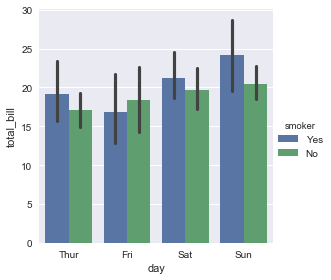

In [44]:
sns.factorplot(x='day',y='total_bill',hue='smoker',data=tips,kind='bar')

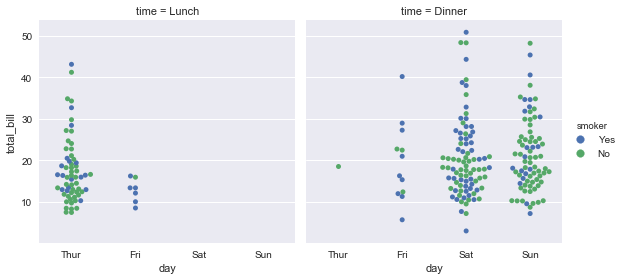

In [45]:
sns.factorplot(x='day',y='total_bill',hue='smoker',
               col='time',data=tips,kind='swarm')

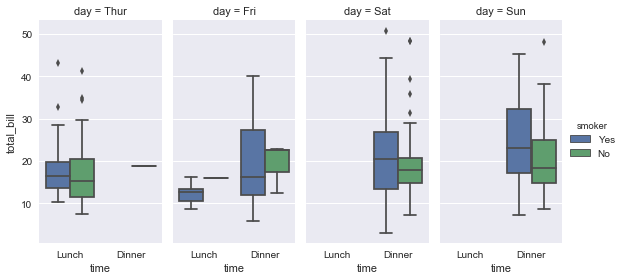

In [46]:
sns.factorplot(x='time',y='total_bill',hue='smoker',
               col='day',data=tips,kind='box',size=4,aspect=0.5)

In [ ]:
kind是可选的， point默认，bar柱形图，count频次，box箱体，violin提琴，strip散点，swarm分散点

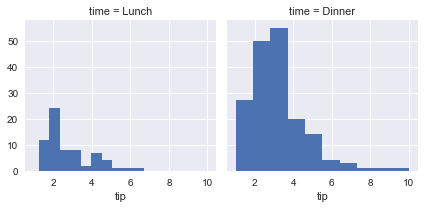

In [51]:
g = sns.FacetGrid(tips,col='time')
g.map(plt.hist,"tip")

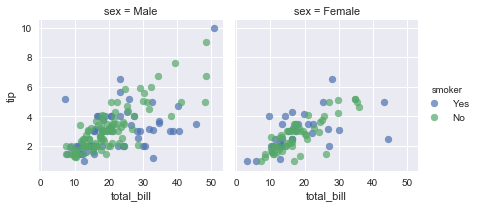

In [52]:
g = sns.FacetGrid(tips,col='sex',hue='smoker')
g.map(plt.scatter,"total_bill","tip",alpha=0.7)
g.add_legend()

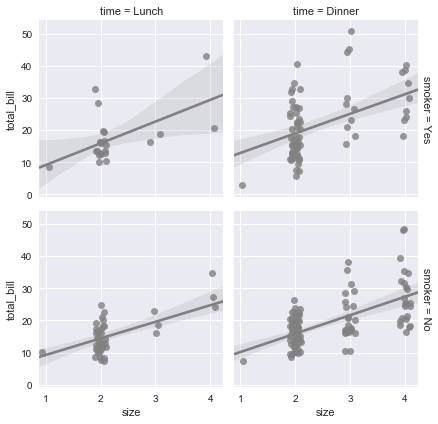

In [58]:
g = sns.FacetGrid(tips,col='time',row='smoker',margin_titles=True)
g.map(sns.regplot,"size","total_bill",color="0.5",fit_reg=True,x_jitter=0.1)
# 颜色是小数指定

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


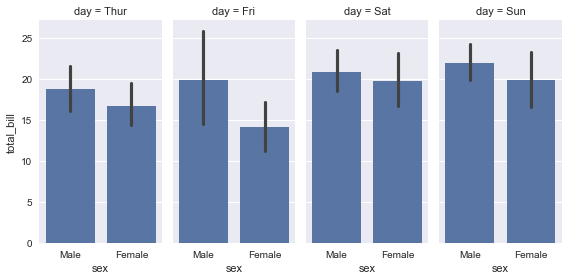

In [61]:
g = sns.FacetGrid(tips,col='day',size=4,aspect=0.5)
g.map(sns.barplot,"sex","total_bill")

CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


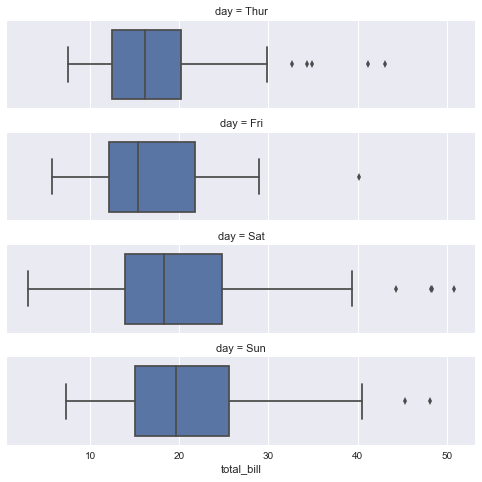

In [63]:
from pandas import Categorical
ordered_days = tips.day.value_counts().index
print(ordered_days)
ordered_days = Categorical(['Thur',"Fri","Sat","Sun"])
# FacetGrid传数据需要是pandas格式
g = sns.FacetGrid(tips,row='day',row_order=ordered_days,size=1.7,aspect=4)
g.map(sns.boxplot,"total_bill")

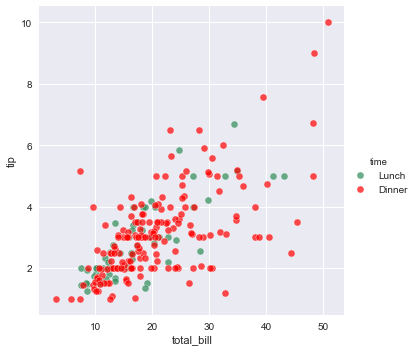

In [71]:
pal = dict(Lunch="seagreen",Dinner="red")# 两个变量自己指定颜色
g=sns.FacetGrid(tips,hue="time",palette=pal,size=5)
g.map(plt.scatter,"total_bill","tip",s=50, alpha=0.7, linewidth=0.5,edgecolor="white")
g.add_legend()

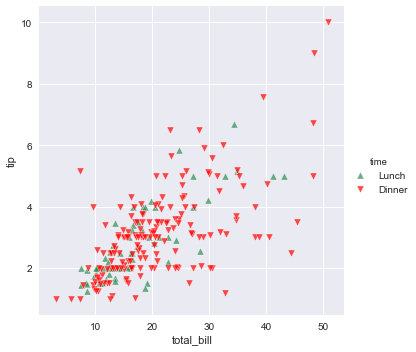

In [72]:
g=sns.FacetGrid(tips,hue="time",palette=pal,size=5,hue_kws={"marker":["^","v"]})
g.map(plt.scatter,"total_bill","tip",s=50, alpha=0.7, linewidth=0.5,edgecolor="white")
g.add_legend()

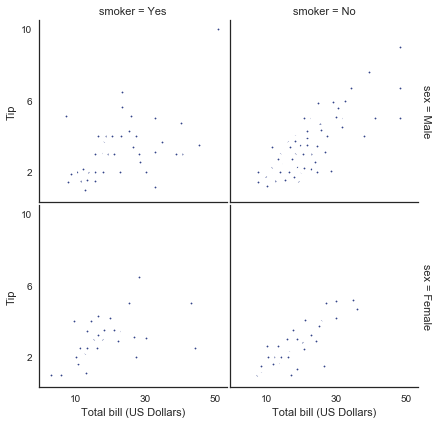

In [76]:
with sns.axes_style("white"):
    g = sns.FacetGrid(tips,row="sex",col="smoker",margin_titles=True,size=3)
g.map(plt.scatter,"total_bill","tip",color="#334488",edgecolor="white",lw=5)
g.set_axis_labels("Total bill (US Dollars)","Tip")
g.set(xticks=[10,30,50],yticks=[2,6,10])# 轴的取值范围
g.fig.subplots_adjust(wspace=0.02,hspace=0.02)# 子图和子图之间的间隔

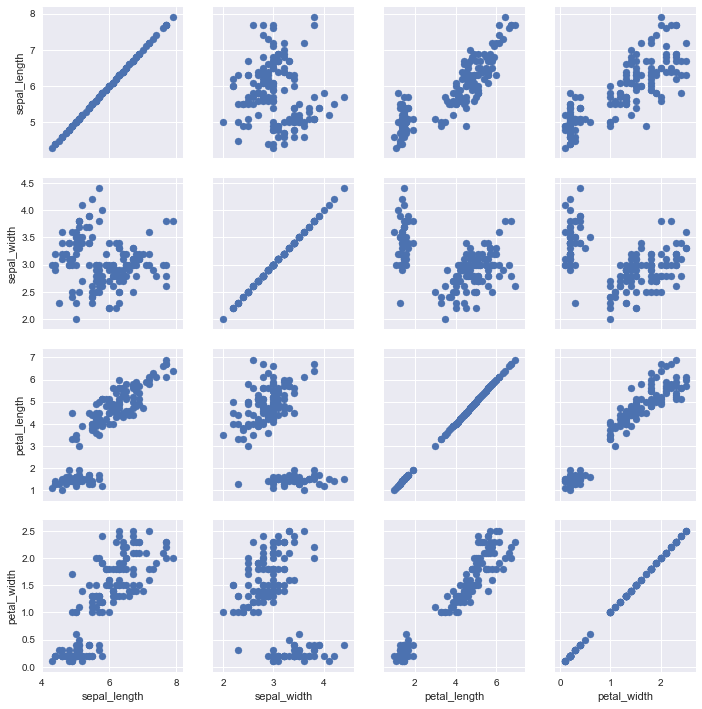

In [77]:
iris = sns.load_dataset("iris")
g = sns.PairGrid(iris)
g.map(plt.scatter)

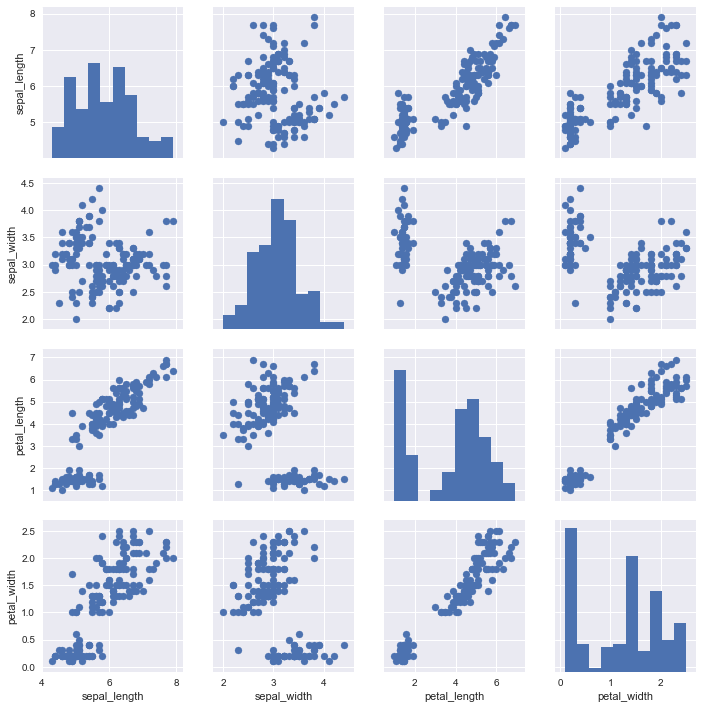

In [78]:
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

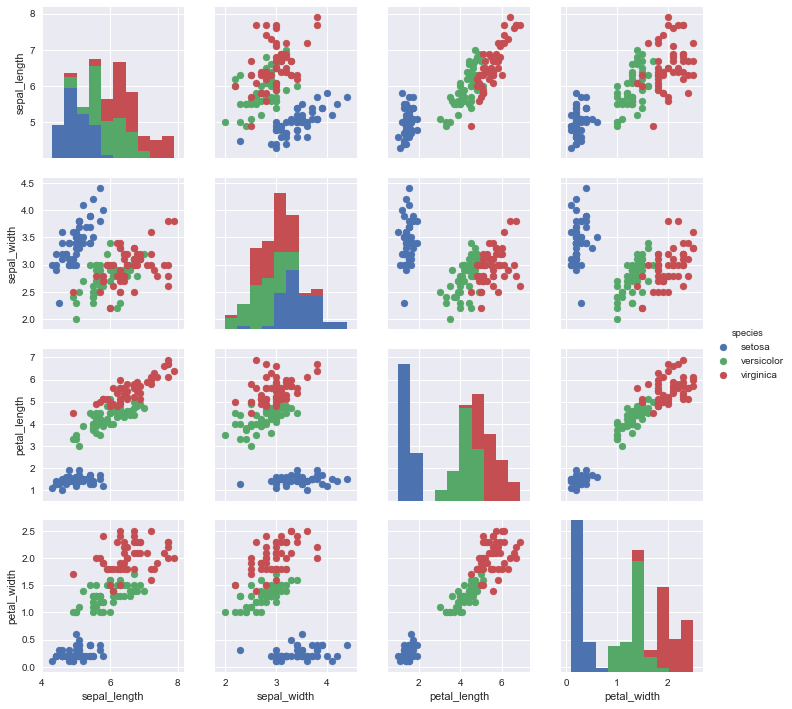

In [79]:
g = sns.PairGrid(iris,hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

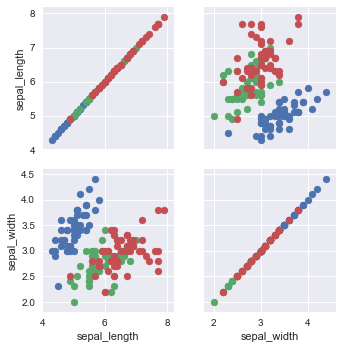

In [82]:
# 指定想画出的特征
feature_=["sepal_length","sepal_width"]
g = sns.PairGrid(iris,vars=feature_, hue="species")
g.map(plt.scatter)

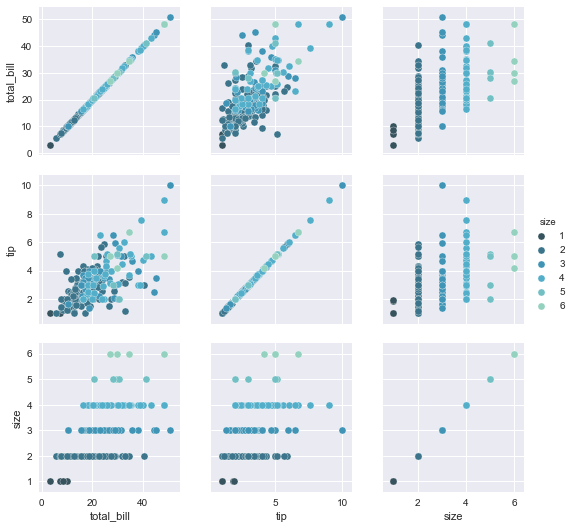

In [84]:
g = sns.PairGrid(tips, hue='size',palette="GnBu_d")#渐变色
g.map(plt.scatter,s=50,edgecolor="white")
g.add_legend()